# Gráfico em "turbina" para avaliar métricas de um determinado atleta

## Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
from mplsoccer import Radar, FontManager

## Carregamento dos dados

In [2]:
data = 'turbine.csv'

In [3]:
df = pd.read_csv(data, header=1)
df.head()

,Player,Pos,90s,Gls,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,G-xG,np:G-xG,-9999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999
1,Brenden Aaronson,MFFW,5.6,0.18,42.9,1.26,0.54,0.14,0.33,0.21,0.21,-0.04,-0.04,5bc43860
2,Che Adams,FW,5.1,0.39,36.4,2.14,0.78,0.18,0.50,0.22,0.22,0.18,0.18,f2bf1b0f
3,Tyler Adams,MF,6.0,0.00,0.0,0.33,0.00,0.00,NaN,0.00,0.00,0.00,0.00,2b09d998
4,Tosin Adarabioyo,DF,7.0,0.14,50.0,0.29,0.14,0.50,1.00,0.01,0.01,0.13,0.13,c81d773d


In [4]:
df = df[df['Pos'] == 'FW']
df = df.drop('-9999', axis=1)
df.head()

,Player,Pos,90s,Gls,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,G-xG,np:G-xG
2,Che Adams,FW,5.1,0.39,36.4,2.14,0.78,0.18,0.50,0.22,0.22,0.18,0.18
13,Miguel Almirón,FW,6.4,0.16,23.1,2.03,0.47,0.08,0.33,0.19,0.19,-0.03,-0.03
14,Julián Álvarez,FW,1.9,1.05,57.1,3.73,2.13,0.29,0.50,0.42,0.42,0.63,0.63
19,Michail Antonio,FW,5.0,0.20,25.0,1.59,0.40,0.13,0.50,0.16,0.16,0.04,0.04
20,Antony,FW,0.6,1.67,66.7,4.74,3.16,0.33,0.50,0.50,0.50,1.17,1.17


## Estudo dos Dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 2 to 408
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   73 non-null     object 
 1   Pos      73 non-null     object 
 2   90s      73 non-null     float64
 3   Gls      73 non-null     float64
 4   SoT%     63 non-null     float64
 5   Sh/90    73 non-null     float64
 6   SoT/90   73 non-null     float64
 7   G/Sh     63 non-null     float64
 8   G/SoT    56 non-null     float64
 9   xG       73 non-null     float64
 10  npxG     73 non-null     float64
 11  G-xG     73 non-null     float64
 12  np:G-xG  73 non-null     float64
dtypes: float64(11), object(2)
memory usage: 8.0+ KB


In [6]:
df.describe()

,90s,Gls,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,G-xG,np:G-xG
count,73.000000,73.000000,63.000000,73.000000,73.000000,63.000000,56.000000,73.000000,73.000000,73.000000,73.000000
mean,3.106849,0.254247,36.042857,2.565890,0.852055,0.104444,0.282679,0.430548,0.419178,-0.176712,-0.176164
std,2.349074,0.366750,21.442441,2.289313,0.814876,0.116006,0.273273,1.047769,1.045082,1.089982,1.090332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000
25%,1.100000,0.000000,22.650000,1.360000,0.210000,0.000000,0.000000,0.160000,0.160000,-0.190000,-0.190000
50%,2.400000,0.000000,33.300000,2.250000,0.710000,0.080000,0.250000,0.250000,0.250000,-0.030000,-0.030000
75%,5.100000,0.430000,50.000000,3.160000,1.270000,0.175000,0.500000,0.440000,0.440000,0.090000,0.090000
max,7.000000,1.750000,100.000000,16.360000,3.700000,0.500000,1.000000,9.000000,9.000000,1.170000,1.170000


In [7]:
df = df[df['90s'] > df['90s'].max()*0.65]
df.head()

,Player,Pos,90s,Gls,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,G-xG,np:G-xG
2,Che Adams,FW,5.1,0.39,36.4,2.14,0.78,0.18,0.50,0.22,0.22,0.18,0.18
13,Miguel Almirón,FW,6.4,0.16,23.1,2.03,0.47,0.08,0.33,0.19,0.19,-0.03,-0.03
19,Michail Antonio,FW,5.0,0.20,25.0,1.59,0.40,0.13,0.50,0.16,0.16,0.04,0.04
49,Jarrod Bowen,FW,6.9,0.00,6.7,2.17,0.14,0.00,0.00,0.16,0.16,-0.16,-0.16
97,Luis Díaz,FW,5.9,0.51,47.1,2.90,1.37,0.18,0.38,0.36,0.36,0.15,0.15


In [8]:
df.isnull().sum()

Player     0
Pos        0
90s        0
Gls        0
SoT%       0
Sh/90      0
SoT/90     0
G/Sh       0
G/SoT      1
xG         0
npxG       0
G-xG       0
np:G-xG    0
dtype: int64

## Limpeza e preparação dos Dados

In [9]:
df = df.dropna(axis=0)

In [10]:
df.isnull().sum()

Player     0
Pos        0
90s        0
Gls        0
SoT%       0
Sh/90      0
SoT/90     0
G/Sh       0
G/SoT      0
xG         0
npxG       0
G-xG       0
np:G-xG    0
dtype: int64

In [11]:
glossary = ['Atleta', 'Posição', '90s', 'Gols', 'Chutes no gol %', 'Chutes', 'Chutes no gol', 'Gols por chute', 'Gols por chute no gol', 
            'Gols esperados', 'Gols esperados - Não Pênaltis', 'Gols menos gols esperados', 'Gols menos gols esperados - Não Pênaltis']

In [12]:
columns = list(df.columns)
columns

['Player',
 'Pos',
 '90s',
 'Gls',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'xG',
 'npxG',
 'G-xG',
 'np:G-xG']

In [13]:
dict_col = {x: y for x, y in zip(columns, glossary)}

In [14]:
dict_col

{'Player': 'Atleta',
 'Pos': 'Posição',
 '90s': '90s',
 'Gls': 'Gols',
 'SoT%': 'Chutes no gol %',
 'Sh/90': 'Chutes',
 'SoT/90': 'Chutes no gol',
 'G/Sh': 'Gols por chute',
 'G/SoT': 'Gols por chute no gol',
 'xG': 'Gols esperados',
 'npxG': 'Gols esperados - Não Pênaltis',
 'G-xG': 'Gols menos gols esperados',
 'np:G-xG': 'Gols menos gols esperados - Não Pênaltis'}

In [15]:
df = df.rename(columns=dict_col)

In [16]:
df.head()

,Atleta,Posição,90s,Gols,Chutes no gol %,Chutes,Chutes no gol,Gols por chute,Gols por chute no gol,Gols esperados,Gols esperados - Não Pênaltis,Gols menos gols esperados,Gols menos gols esperados - Não Pênaltis
2,Che Adams,FW,5.1,0.39,36.4,2.14,0.78,0.18,0.50,0.22,0.22,0.18,0.18
13,Miguel Almirón,FW,6.4,0.16,23.1,2.03,0.47,0.08,0.33,0.19,0.19,-0.03,-0.03
19,Michail Antonio,FW,5.0,0.20,25.0,1.59,0.40,0.13,0.50,0.16,0.16,0.04,0.04
49,Jarrod Bowen,FW,6.9,0.00,6.7,2.17,0.14,0.00,0.00,0.16,0.16,-0.16,-0.16
97,Luis Díaz,FW,5.9,0.51,47.1,2.90,1.37,0.18,0.38,0.36,0.36,0.15,0.15


In [17]:
df['Atleta']

2                Che Adams
13          Miguel Almirón
19         Michail Antonio
49            Jarrod Bowen
97               Luis Díaz
128             Phil Foden
150         Anthony Gordon
151           Demarai Gray
160         Erling Haaland
161          Jack Harrison
184          Gabriel Jesus
195             Harry Kane
242             Martinelli
265    Aleksandar Mitrović
310        Marcus Rashford
315             Bobby Reid
333            Bukayo Saka
334          Mohamed Salah
340           Jadon Sancho
377             Ivan Toney
388            Jamie Vardy
399          Ollie Watkins
Name: Atleta, dtype: object

In [18]:
df_nr = df.select_dtypes('float64')
cols = list(df_nr.columns)

In [19]:
cols

['90s',
 'Gols',
 'Chutes no gol %',
 'Chutes',
 'Chutes no gol',
 'Gols por chute',
 'Gols por chute no gol',
 'Gols esperados',
 'Gols esperados - Não Pênaltis',
 'Gols menos gols esperados',
 'Gols menos gols esperados - Não Pênaltis']

## Gráfico

In [20]:
low = df[cols].quantile(0.05).values
high = df[cols].quantile(0.95).values
#lower_is_better = []
radar = Radar(cols, low, high, num_rings=4)
fm = FontManager()

In [21]:
player_values = df.loc[df['Atleta'] == 'Gabriel Jesus', cols].values[0].tolist()

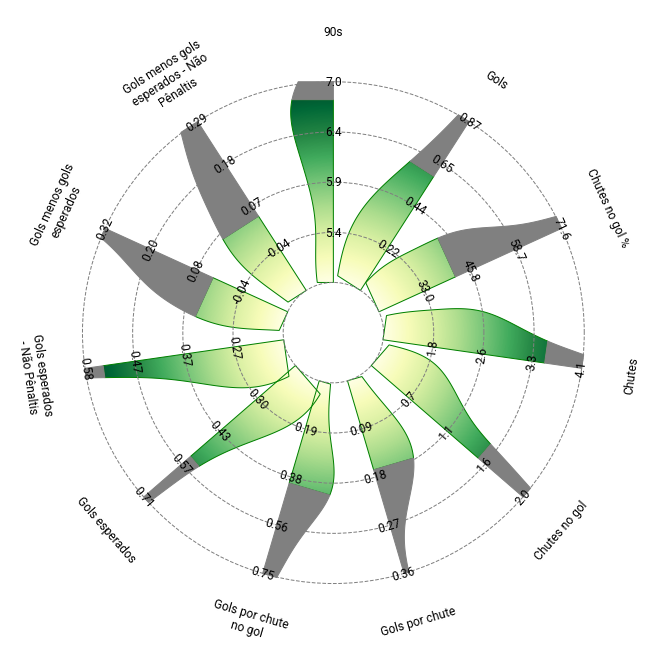

In [22]:
fig, ax = radar.setup_axis()

turbine = radar.turbine(player_values, df_nr[cols].values, ax=ax, 
                        kwargs_inner={'edgecolor': 'green'}, 
                        kwargs_inner_gradient={'cmap': 'YlGn'}, 
                        kwargs_outer={'facecolor': 'gray', 'edgecolor': 'gray'})

rings_inner = radar.draw_circles(ax=ax, facecolor='None', edgecolor='gray', linestyle='--')
range_labels = radar.draw_range_labels(ax=ax, fontsize=12, fontproperties=fm.prop, zorder=2)
param_labels = radar.draw_param_labels(ax=ax, fontsize=12, fontproperties=fm.prop, zorder=2)